### Note
*In this dataset the question is how to extract info about Top 10 Books*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import scipy

In [2]:
df = pd.read_csv("audible_uncleaned.csv")

In [3]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,4/8/2008,English,5 out of 5 stars34 ratings,468
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,1/5/2018,English,4.5 out of 5 stars41 ratings,820
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,6/11/2020,English,4.5 out of 5 stars38 ratings,410
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,5/10/2021,English,4.5 out of 5 stars12 ratings,615
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,1/13/2010,English,4.5 out of 5 stars181 ratings,820


In [4]:
df.shape

(87489, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [6]:
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

*Our dataset consists of all non-null values so we can head towards the phase of Data Cleaning*

# Handling Duplicate Values

In [7]:
df.shape

(87489, 8)

In [8]:
df.drop_duplicates(subset = ['name'], inplace = True)

In [9]:
df.shape

(82767, 8)

# Data Cleaning

### Cleaning 'Author' and 'Narrator' columns

In [10]:
df['author'].unique()

array(['Writtenby:GeronimoStilton', 'Writtenby:RickRiordan',
       'Writtenby:JeffKinney', ..., 'Writtenby:RogerW.Thompson',
       'Writtenby:ChrisStewart', "Writtenby:StephenO'Shea"], dtype=object)

In [11]:
def handleauthor(value):
    if 'writtenby' in value.lower():
        return value.split(":")[1]

df['author'] = df['author'].apply(handleauthor)

In [12]:
df['narrator'].unique()

array(['Narratedby:BillLobely', 'Narratedby:RobbieDaymond',
       'Narratedby:DanRussell', ..., 'Narratedby:JeanMarsh',
       'Narratedby:McAvoyLayne', 'Narratedby:ChrisStewart'], dtype=object)

In [13]:
def handlenarrator(value):
    if 'narratedby' in value.lower():
        return value.split(":")[1]

df['narrator'] = df['narrator'].apply(handlenarrator)

### Cleaning 'Stars' and 'Ratings' columns

In [14]:
df['stars'].unique()

array(['5 out of 5 stars34 ratings', '4.5 out of 5 stars41 ratings',
       '4.5 out of 5 stars38 ratings', '4.5 out of 5 stars12 ratings',
       '4.5 out of 5 stars181 ratings', '5 out of 5 stars72 ratings',
       '5 out of 5 stars11 ratings', '5 out of 5 stars50 ratings',
       '5 out of 5 stars5 ratings', '5 out of 5 stars58 ratings',
       '4.5 out of 5 stars130 ratings', '5 out of 5 stars6 ratings',
       '5 out of 5 stars7 ratings', '5 out of 5 stars41 ratings',
       '4 out of 5 stars2 ratings', '4.5 out of 5 stars33 ratings',
       '5 out of 5 stars20 ratings', '5 out of 5 stars13 ratings',
       '5 out of 5 stars79 ratings', '4.5 out of 5 stars47 ratings',
       '5 out of 5 stars27 ratings', '4.5 out of 5 stars25 ratings',
       '5 out of 5 stars101 ratings', '5 out of 5 stars15 ratings',
       '5 out of 5 stars3 ratings', '5 out of 5 stars18 ratings',
       '4.5 out of 5 stars37 ratings', '5 out of 5 stars9 ratings',
       '5 out of 5 stars8 ratings', 'Not rated 

In [15]:
def handleratings(value):
    if 'stars' in value.lower():
        rating = value.split(" out of 5 stars")[1]
        ratings = rating.split(" ")[0]
        if "," in ratings:
            rating_cleaned = float(ratings.split(",")[0])*1000 + float(ratings.split(",")[1])
            return rating_cleaned
        else:
            return ratings
    elif 'not rated yet' in value.lower():
        return 0
    else:
        return 0

df['ratings'] = df['stars'].apply(handleratings)
df['ratings'].head()

0     34
1     41
2     38
3     12
4    181
Name: ratings, dtype: object

In [16]:
def handlestars(value):
    if 'stars' in value.lower():
        return float(value.split(" out of 5 stars")[0])
    else:
        return 0

df['stars'] = df['stars'].apply(handlestars)
df['stars'].head()

0    5.0
1    4.5
2    4.5
3    4.5
4    4.5
Name: stars, dtype: float64

In [17]:
df['stars'] = df['stars'].astype('float64')
df['ratings'] = df['ratings'].astype('float64')

### Cleaning Price

In [18]:
df['price'].unique()

array(['468', '820', '410', '615', '656', '233', '1,256.00', '1,206.00',
       '1,093.00', '467', '836', '1,003.00', '957', '683', '469', '374',
       '702', '501', '284', '575', '668', '305', '1,170.00', '266',
       '1,005.00', '323', '516', '445', '585', '703', '117', '192', '76',
       '821', '200', '706', '904', '679', '112', '531', '586', '1,172.00',
       '949', '322', '569', '398', '352', '164', '234', '303', '32',
       '166', '38', '75', '799', '664', '204', '568', '186', '797', '99',
       '65', '300', '113', '493', '573', '759', '367', '338', '1,382.00',
       '105', '422', '754', '492', '529', '189', '258', '609', '1,328.00',
       '187', '726', '645', '151', '115', '149', '263', '307', '116',
       '225', '959', '452', '36', '265', '653', '515', '227', '351',
       '500', '333', '301', '93', '397', '502', '267', '384', '268',
       '153', '733', '434', '228', '600', '535', '968', '854', '132',
       '334', '401', '866', '402', '420', '417', '190', '251', '335

In [19]:
def handleprice(value):
    if "," in value:
        return float(value.split(",")[0])*1000 + float(value.split(",")[1])
    elif "free" in value.lower():
        return 0
    else:
        return value

df['price'] = df['price'].apply(handleprice)
df['price'].head()

0    468
1    820
2    410
3    615
4    820
Name: price, dtype: object

In [20]:
df['price'] = df['price'].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82767 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         82767 non-null  object 
 1   author       82767 non-null  object 
 2   narrator     82767 non-null  object 
 3   time         82767 non-null  object 
 4   releasedate  82767 non-null  object 
 5   language     82767 non-null  object 
 6   stars        82767 non-null  float64
 7   price        82767 non-null  float64
 8   ratings      82767 non-null  float64
dtypes: float64(3), object(6)
memory usage: 6.3+ MB


### Cleaning Time column

In [22]:
df['time'].unique()

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins', ...,
       '40 hrs and 58 mins', '24 hrs and 8 mins', '24 hrs and 4 mins'],
      dtype=object)

In [23]:
temp = df['time'] == '1 min'

In [24]:
temp.unique()

array([False,  True])

In [25]:
def handlehours(value):
    try:
        if 'hrs' in value and 'mins' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs + mins / 60
        elif 'hr' in value and 'mins' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs + mins / 60
        elif 'hrs' in value and 'min' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs + mins / 60
        elif 'hr' in value and 'min' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs + mins / 60
        elif 'hrs' in value or 'hr' in value:
            hrs = float(value.split(" ")[0])
            return hrs
        elif 'mins' in value or 'min' in value:
            mins = float(value.split(" ")[0])
            return mins / 60
        else:
            return 0
    except ValueError:
        return 0

df['time_hour'] = df['time'].apply(handlehours)

In [26]:
df['time_hour'] = df['time_hour'].astype('float64')

In [27]:
def handleminutes(value):
    try:
        if 'hrs' in value and 'mins' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs * 60 + mins
        elif 'hr' in value and 'mins' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs * 60 + mins
        elif 'hrs' in value and 'min' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs * 60 + mins
        elif 'hr' in value and 'min' in value:
            temp_hrs, temp_mins = value.split(' and ')
            hrs = float(temp_hrs.split(" ")[0])
            mins = float(temp_mins.split(" ")[0])
            return hrs * 60 + mins
        elif 'hrs' in value or 'hr' in value:
            hrs = float(value.split(" ")[0])
            return hrs * 60
        elif 'mins' in value or 'min' in value:
            mins = float(value.split(" ")[0])
            return mins
        else:
            return 0
    except ValueError:
        return 0

df['time_minute'] = df['time'].apply(handleminutes)

In [28]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price,ratings,time_hour,time_minute
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,4/8/2008,English,5.0,468.0,34.0,2.333333,140.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,1/5/2018,English,4.5,820.0,41.0,13.133333,788.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,6/11/2020,English,4.5,410.0,38.0,2.050000,123.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,5/10/2021,English,4.5,615.0,12.0,11.266667,676.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,1/13/2010,English,4.5,820.0,181.0,10.000000,600.0


# Data Visualization

### Visualizing Stars and Ratings Columns

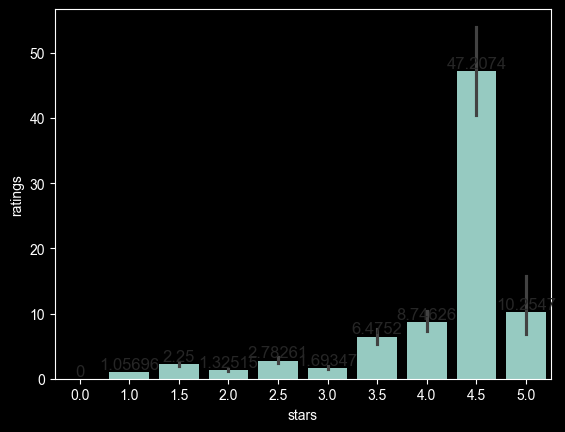

In [29]:
ax = sns.barplot(data = df, x = 'stars', y = 'ratings')
sns.set(rc = {'figure.figsize' : (10, 5)},)
for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that most of the ratings are of 4.5 stars*

### Visualizing Language

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\2411170617.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


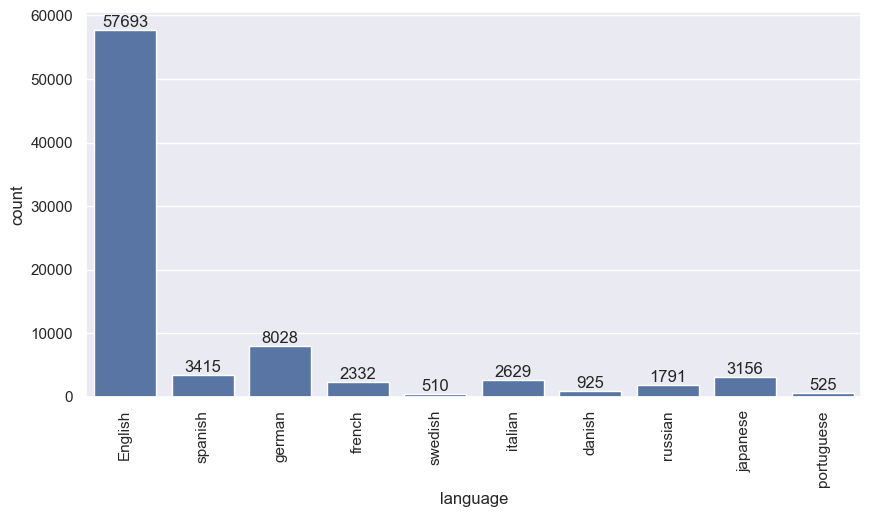

In [30]:
lang = df[df['language'].isin(df['language'].value_counts().nlargest(10).index)]

ax = sns.countplot(data = lang, x = 'language')
sns.set(rc = {'figure.figsize' : (7, 5)},)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that most of the books and audios are in English and then German and Spanish languages*

### Visualizing Name vs Stars

In [31]:
ratings = df.groupby(['name', 'ratings'], as_index = False)['stars'].sum().sort_values(by = 'ratings', ascending = False).head(10)
ratings

,name,ratings,stars
6397,Atomic Habits,12569.0,5.0
66398,The Psychology of Money,5972.0,4.5
50966,Sapiens,5500.0,5.0
49642,Rich Dad Poor Dad,5324.0,4.5
37204,Life's Amazing Secrets,4184.0,4.5
68435,The Subtle Art of Not Giving a F*ck,3461.0,4.5
7538,Becoming,2924.0,4.5
10632,Can't Hurt Me,2277.0,5.0
828,21 Lessons for the 21st Century,2236.0,4.5
20064,Elon Musk,2161.0,4.5


C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\3448179923.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


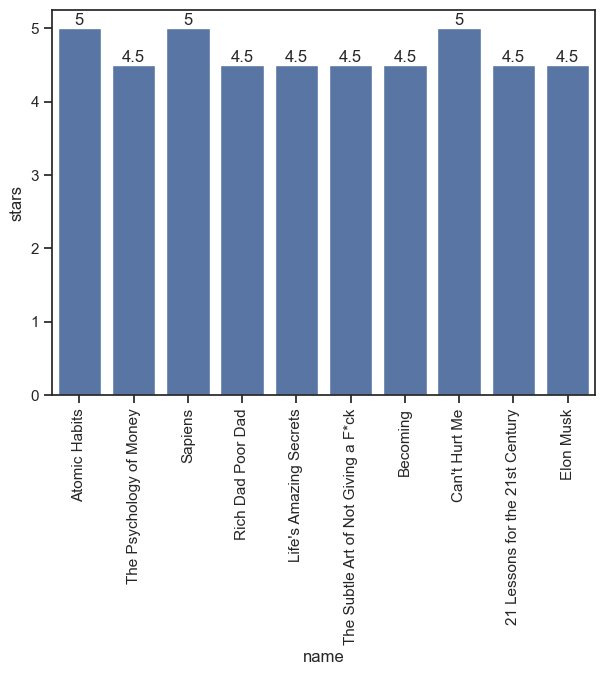

In [32]:
# With respect to Stars and Ratings
ratings = df.groupby(['name', 'ratings'], as_index = False)['stars'].sum().sort_values(by = 'ratings', ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (7, 5)}, style = "ticks")
ax = sns.barplot(x = 'name', y = 'stars', data = ratings)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that the most rated top 10 books contains Atomic Habits, The Physocology of Money, Sapiens ...... Elon Musk*

### Visualizing Time

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\1772182230.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 37428 (\N{CJK UNIFIED IDEOGRAPH-9234}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82:

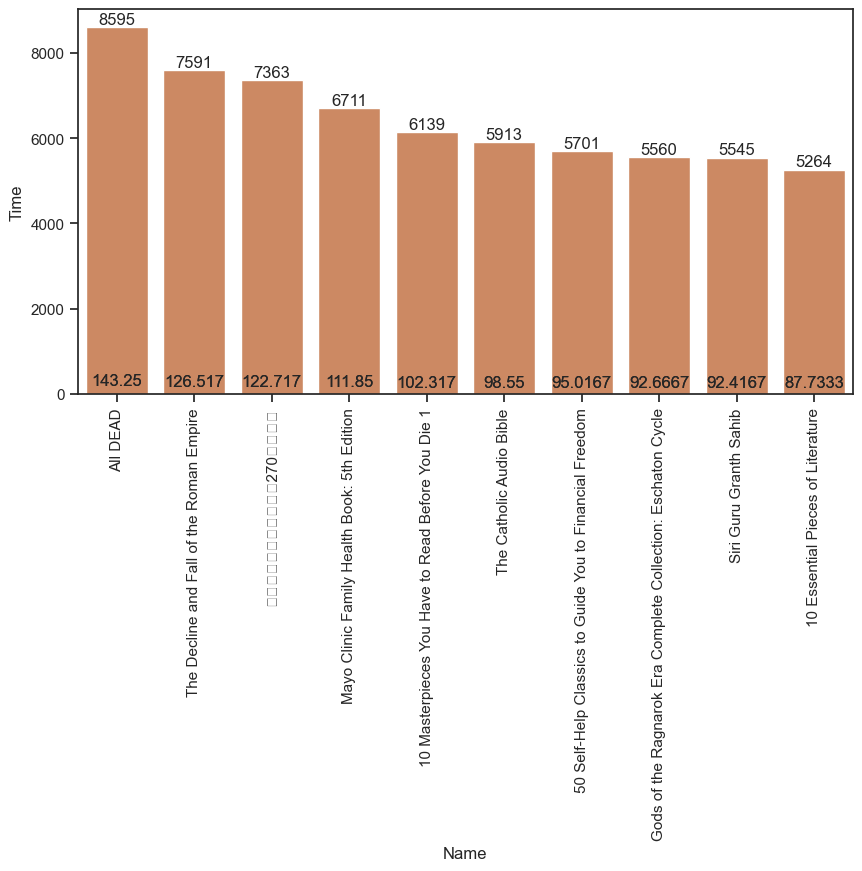

In [33]:
# Hours
time_hour = df.groupby(['name'], as_index = False)['time_hour'].sum().sort_values(by = 'time_hour', ascending = False).head(10)

sns.set(rc={'figure.figsize': (10, 5)}, style="ticks")
ax = sns.barplot(x='name', y='time_hour', data=time_hour)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Name')
ax.set_ylabel('Time')

for bars in ax.containers:
    ax.bar_label(bars)

# Minutes
time_minute = df.groupby(['name'], as_index = False)['time_minute'].sum().sort_values(by = 'time_minute', ascending = False).head(10)
ax = sns.barplot(x = 'name', y = 'time_minute', data = time_minute)

for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that:*
- Length of Book and its Ratings are inversly related, i.e The longer the length the less the rating
- It has a great effect on the ratings
- People prefer Books of short length, It is challenging for them to read or listen. 

## Top Rated Books

In [40]:
top_rated_books = ['Atomic Habits', 'The Psychology of Money', 'Sapiens', 'Rich Dad Poor Dad', "Life's Amazing Secrets", 'The Subtle Art of Not Giving a F*ck', "Becoming', 'Can't Hurt Me", '21 Lessons for the 21st Century', 'Elon Musk']
new_df = df[df['name'].isin(top_rated_books)]
new_df

,name,author,narrator,time,releasedate,language,stars,price,ratings,time_hour,time_minute
23006,Elon Musk,AshleeVance,FredSanders,13 hrs and 23 mins,28-04-16,English,4.5,820.0,2161.0,13.383333,803.0
35942,Atomic Habits,JamesClear,JamesClear,5 hrs and 35 mins,18-10-18,English,5.0,820.0,12569.0,5.583333,335.0
41082,Sapiens,YuvalNoahHarari,DerekPerkins,15 hrs and 18 mins,30-04-15,English,5.0,957.0,5500.0,15.300000,918.0
41106,21 Lessons for the 21st Century,YuvalNoahHarari,DerekPerkins,11 hrs and 41 mins,30-08-18,English,4.5,957.0,2236.0,11.683333,701.0
57858,The Psychology of Money,MorganHousel,ChrisHill,5 hrs and 48 mins,8/9/2020,English,4.5,668.0,5972.0,5.800000,348.0
57863,Rich Dad Poor Dad,RobertT.Kiyosaki,TimWheeler,6 hrs and 9 mins,15-06-12,English,4.5,837.0,5324.0,6.150000,369.0
62293,The Subtle Art of Not Giving a F*ck,MarkManson,RogerWayne,5 hrs and 17 mins,13-09-16,English,4.5,1181.0,3461.0,5.283333,317.0
62294,Life's Amazing Secrets,GaurGopalDas,GaurGopalDas,6 hrs and 25 mins,10/12/2019,English,4.5,1005.0,4184.0,6.416667,385.0


### Visualizing Top Rated Books x Time

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\2498044938.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


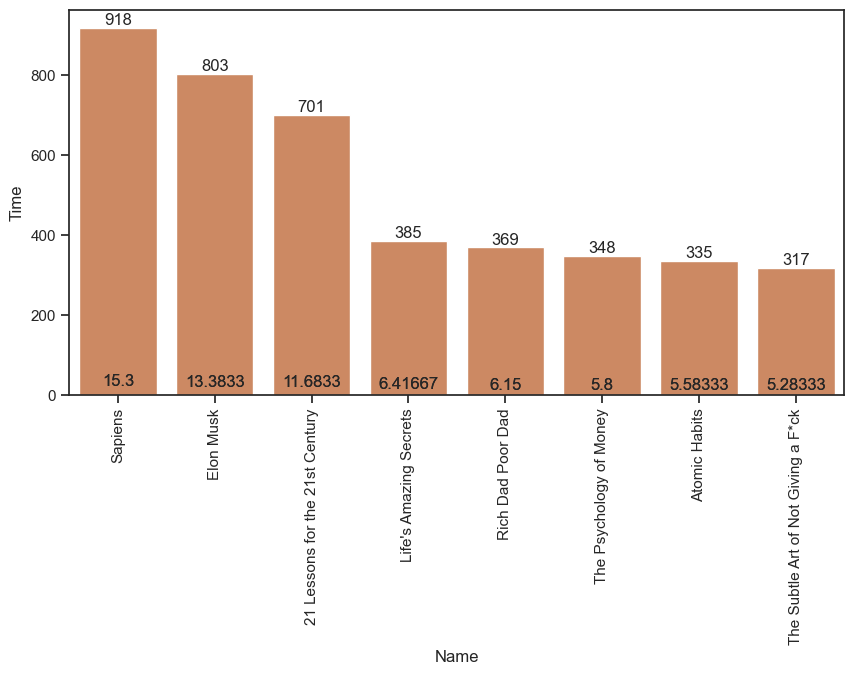

In [41]:
# Hours
time_hour = new_df.groupby(['name'], as_index = False)['time_hour'].sum().sort_values(by = 'time_hour', ascending = False).head(10)

sns.set(rc={'figure.figsize': (10, 5)}, style="ticks")
ax = sns.barplot(x='name', y='time_hour', data=time_hour)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Name')
ax.set_ylabel('Time')

for bars in ax.containers:
    ax.bar_label(bars)

# Minutes
time_minute = new_df.groupby(['name'], as_index = False)['time_minute'].sum().sort_values(by = 'time_minute', ascending = False).head(10)
ax = sns.barplot(x = 'name', y = 'time_minute', data = time_minute)

for bars in ax.containers:
    ax.bar_label(bars)

### Visualizing Top Rated Books x Author & Narrator

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\3064139133.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


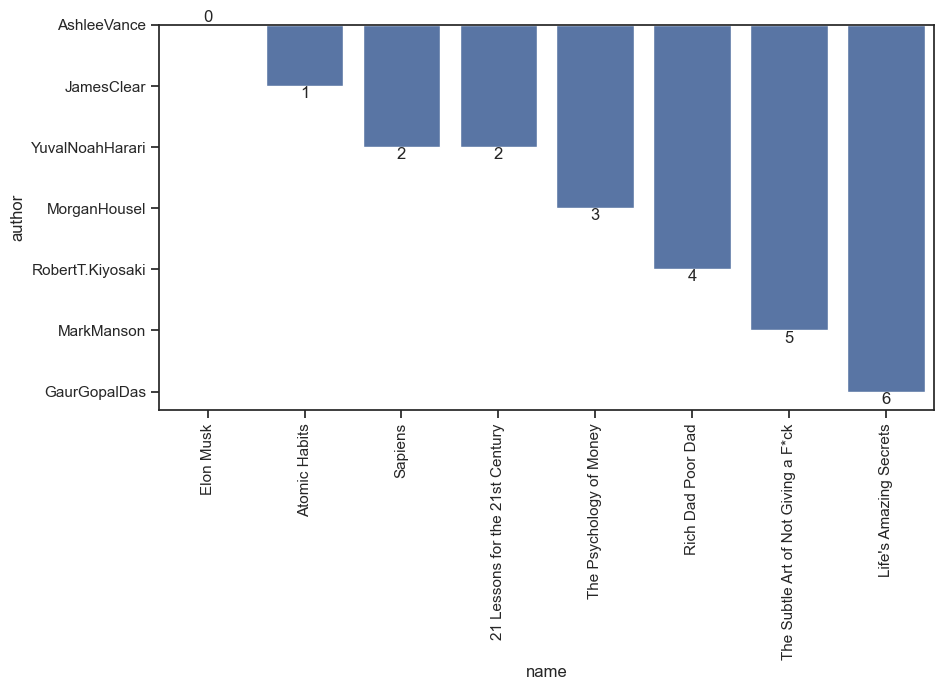

In [51]:
ax = sns.barplot(y = 'author', x ='name', data = new_df)

sns.set(rc={'figure.figsize': (10, 5)}, style = "ticks")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\2402542661.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


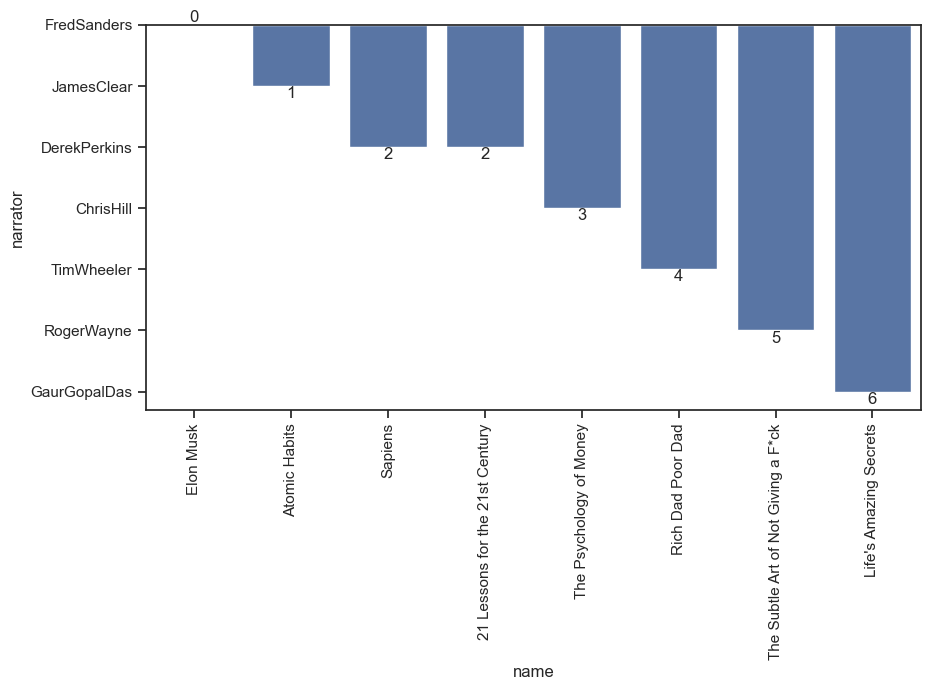

In [52]:
ax = sns.barplot(y = 'narrator', x ='name', data = new_df)

sns.set(rc={'figure.figsize': (10, 5)}, style = "ticks")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

### Visualizing Top Rated Books x Price & Language

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\94871027.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


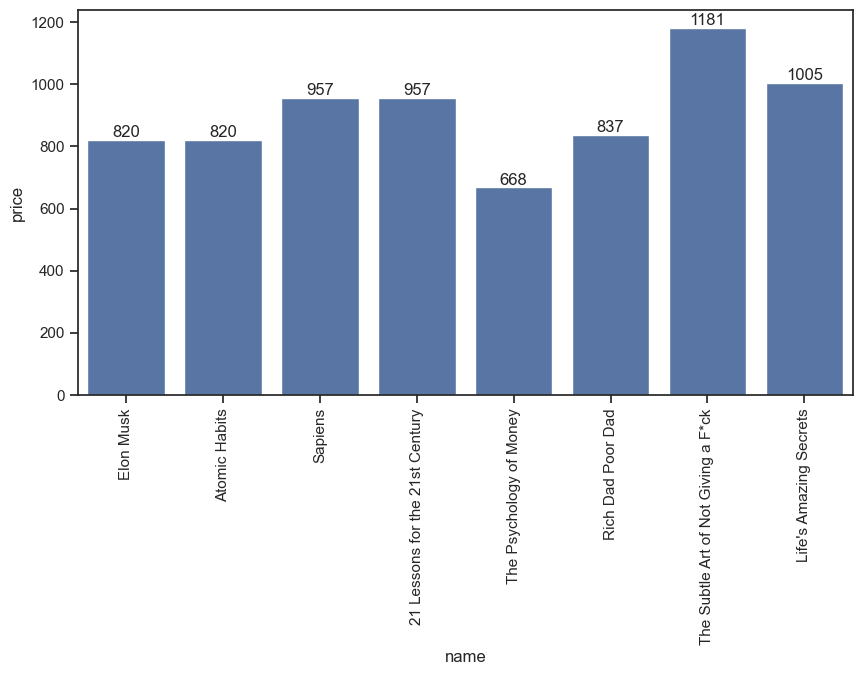

In [53]:
ax = sns.barplot(y = 'price', x ='name', data = new_df)

sns.set(rc={'figure.figsize': (10, 5)}, style = "ticks")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

## Conclusions:
*From this we can conclude that:*
- The Top Rated Books are written by "JamesClear, AshleeVance, YuvalNoahHarai, GaurGopalDas, MorganHousel, MarkManson, RobertT.Kiyosaki".
- The Top Rated Books are narrated by "DerekPerkins, GaurGopalDas, FredSanders, JamesClear, ChrisHill, TimWheeler, RogerWayne".
- Books that are Preffered by People are of between '5 - 15 hours'
- Books that are Preffered by People in terms of price are between '600 - 1200'

### Visualizing Author

In [35]:
df['author'].value_counts().head(10)

author
矢島雅弘,石橋遊                      874
SmartReading                  405
中西貴之,BJ                       311
div.                          273
OnlineStudioProductions       212
BillBrown                     194
J.M.Gardner                   174
InnovativeLanguageLearning    166
GertrudeChandlerWarner        159
WilliamShakespeare            139
Name: count, dtype: int64

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\445076633.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: 

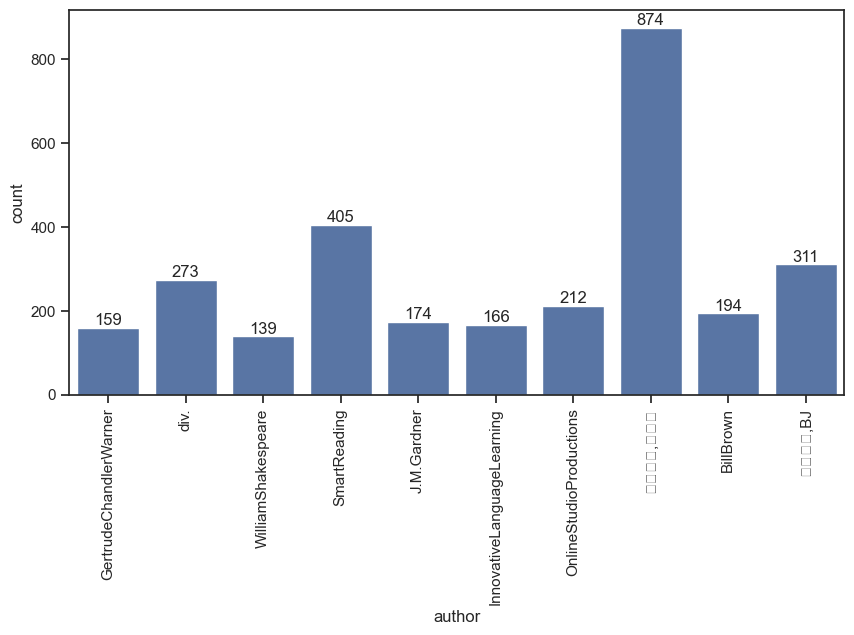

In [36]:
author = df[df['author'].isin(df['author'].value_counts().nlargest(10).index)]

ax = sns.countplot(data = author, x = 'author')
sns.set(rc = {'figure.figsize' : (7, 5)},)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that most of the books are written by 矢島雅弘,石橋遊; SmartReading and div.*

### Visualizing Narrator

In [37]:
df['narrator'].value_counts().head(10)

narrator
anonymous                1013
矢島雅弘,石橋遊                  874
Intuitive                 452
中西貴之,BJ                   311
uncredited                310
BookBuddyDigitalMedia     251
div.                      226
ДмитрийЕвстратов          221
BillBrown                 194
TomParks                  163
Name: count, dtype: int64

C:\Users\Khraab PC\AppData\Local\Temp\ipykernel_12788\921985152.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: 

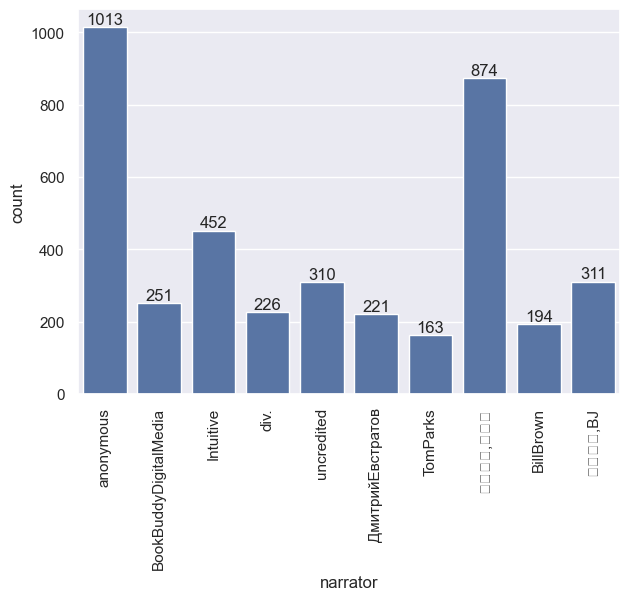

In [38]:
narrator = df[df['narrator'].isin(df['narrator'].value_counts().nlargest(10).index)]

ax = sns.countplot(data = narrator, x = 'narrator')
sns.set(rc = {'figure.figsize' : (7, 5)},)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for bars in ax.containers:
    ax.bar_label(bars)

### Conclusion
*From this graph we can conclude that most of the books are narrated by anonymous, 矢島雅弘,石橋遊 and Intuitive*

### Visualizing Name x Price

c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12379 (\N{HIRAGANA LETTER SE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20253 (\N{CJK UNIFIED IDEOGRAPH-4F1D}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Khraab PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\

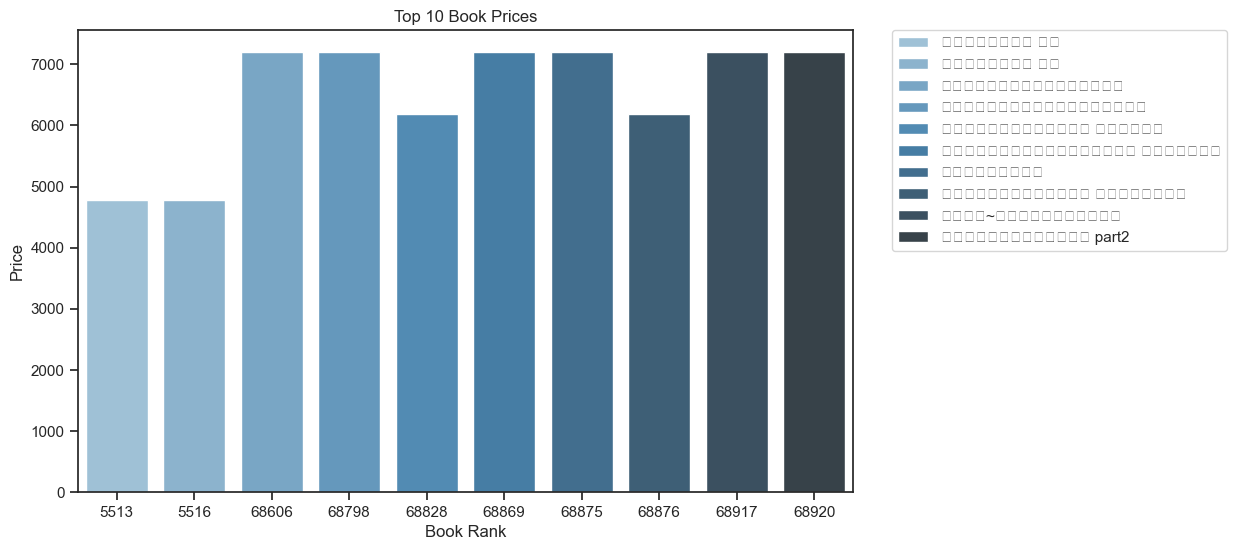

In [57]:
top_10_books = df.nlargest(10, 'price')[['name', 'price']]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_books.index, y=top_10_books['price'], hue=top_10_books['name'], palette="Blues_d")
ax.set_xlabel('Book Rank')
ax.set_ylabel('Price')
ax.set_title('Top 10 Book Prices')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [58]:
top_10_books['name']

68606             ストレスを取り除くセルフセラピー
68798           恋愛の勇気をくれるラブリーチャイルド
68869    人生の転換期を迎えるためのセラピー 人生の闇を葬る
68875                    性格改善プログラム
68917             前世療法~ソウルメイトと出逢う旅
68920          理想のパートナーと出逢う法 part2
68828         親子関係を改善するセラピー 親の立場から
68876       親子関係を改善するセラピー 子どもの立場から
5513                   せかい伝記図書館 全集
5516                   せかい童話図書館 全集
Name: name, dtype: object

### Conclusion
*From this we can conclude that the top prices of books are 4500 - 7500 which is not a reasonable price for buyers.*

# Conclusions:
From this dataset we can conclude that:
- The most rated books are "Atomic Habits, The Physocology of Money, Sapiens ...... Elon Musk" with 4.5 to 5 Stars.
- Most of Books are in "English, German, Spanish" Languages.
- Books of time length "" are Preffered, It is challenging for them to read and listen longer Books.
- The Top Rated Books are written by "JamesClear, AshleeVance, YuvalNoahHarai, GaurGopalDas, MorganHousel, MarkManson, RobertT.Kiyosaki".
- The Top Rated Books are narrated by "DerekPerkins, GaurGopalDas, FredSanders, JamesClear, ChrisHill, TimWheeler, RogerWayne".
- Books that are Preffered by People are of between '5 - 15 hours'
- Books that are Preffered by People in terms of price are between '600 - 1200'